# Credit Card Fraud Detection_Supervised learning
Freference:    
    [recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)    
[Confusion Matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
    
    

In [1]:
# Import library and read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/creditcard2.csv",header=0)
occ = df['Class'].value_counts()
print(occ)
print(occ / len(df.index))

0    7000
1     300
Name: Class, dtype: int64
0    0.958904
1    0.041096
Name: Class, dtype: float64


#  Sampling

Synthetic Minority Oversampling Technique (SMOTE)
Resampling: removing samples from the majority class (under-sampling); adding more examples from the minority class (over-sampling).
    
SMOTE works randomly picing a point from the minority class and computing the k-nearest neighbors for this point. 
The synthetic points are added between the chosen point and its neighbors.

In [3]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [4]:
# Preparing dataset
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = df.iloc[:, 1:29].values
    y = df.Class.values
    return X, y

# Create X and y from the prep_data function 
X, y = prep_data(df)


In [5]:
# Count the total number of non-fraudulent observations 
total_obs = len(y)
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')

95.89%


In [6]:
# Set the input and output data
from sklearn.model_selection import train_test_split
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
np.unique(y_test)

array([0, 1], dtype=int64)

### Compare the resampling data with original set

In [7]:
# plot data
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 5], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 5], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

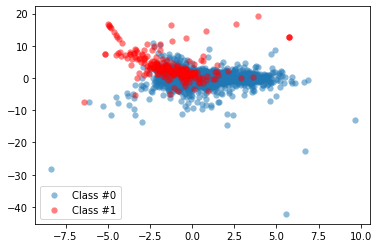

0    4892
1     218
dtype: int64


array([0, 1], dtype=int64)

In [8]:
plot_data(X_train, y_train)
print(pd.value_counts(pd.Series(y_train)))
np.unique(y_train)

0.7.0


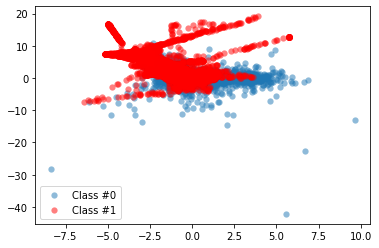

1    4892
0    4892
dtype: int64


In [9]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
method = SMOTE()
##### Create the resampled feature set
X_train, y_train = method.fit_sample(X_train, y_train)

plot_data(X_train, y_train)
print(pd.value_counts(pd.Series(y_train)))

In [10]:
np.unique(y_train)

array([0, 1], dtype=int64)

# 2. Flag fraudulent transactions with Supervised Machine Learning


In [11]:

### Define model evaluation function
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
   
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))
    print('\naccuracy:')
    print(model.score(X_test, y_test))
    print('ROC Score:')
    print(roc_auc_score(y_test, probs[:,1]))
    fallout, sensitivity, thresholds = roc_curve(y_test, probs[:,1])
    plt.plot(fallout, sensitivity, color = 'darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.show()
    
 

## Random Forest

ROC Score:
0.9825837691488869

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2108
           1       0.91      0.83      0.87        82

    accuracy                           0.99      2190
   macro avg       0.95      0.91      0.93      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2101    7]
 [  14   68]]

accuracy:
0.9904109589041096
ROC Score:
0.9825837691488869


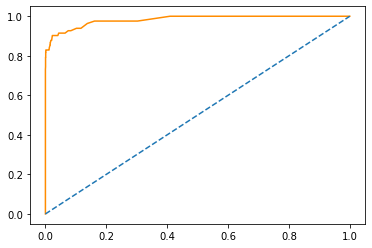

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=123, n_estimators=100)

# Fit training model to training set

model.fit(X_train, y_train)
get_model_results(X_train, y_train,X_test,y_test,model)

Precision: [0.03744292 0.90666667 1.        ]
Recall: [1.         0.82926829 0.        ]


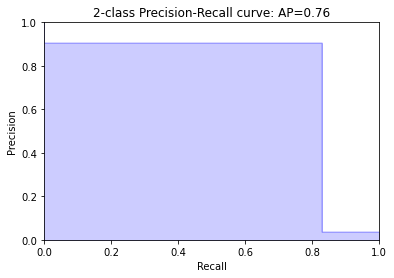

In [13]:
# Plotting the Precision vs. Recall Curve
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
average_precision = average_precision_score(y_test, predicted)
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')

def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: Average Precision={average_precision:0.2f}')
    return plt.show()
plot_pr_curve(recall, precision, average_precision)

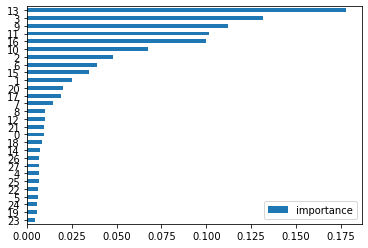

In [14]:
pd.DataFrame({'feature':df.columns.drop(['Unnamed: 0','Amount','Class']), 'importance':model.feature_importances_}).sort_values(['importance']).plot(kind='barh')

### Tuning RF model

ROC Score:
0.9770329060026843

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2108
           1       0.58      0.83      0.68        82

    accuracy                           0.97      2190
   macro avg       0.79      0.90      0.83      2190
weighted avg       0.98      0.97      0.97      2190


Confusion Matrix:
[[2059   49]
 [  14   68]]

accuracy:
0.9712328767123287
ROC Score:
0.9770329060026843


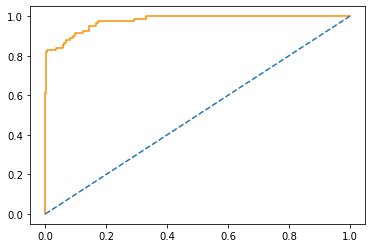

In [15]:
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=123)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

### Parameter optimization with GridSearchCV for RF

GridSearchCV evaluates all combinations of parameters defined in the parameter grid

In [16]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 10,20,30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=123)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 30}

ROC Score:
0.9797750728930439

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2108
           1       0.86      0.83      0.84        82

    accuracy                           0.99      2190
   macro avg       0.93      0.91      0.92      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2097   11]
 [  14   68]]

accuracy:
0.9885844748858448
ROC Score:
0.9797750728930439


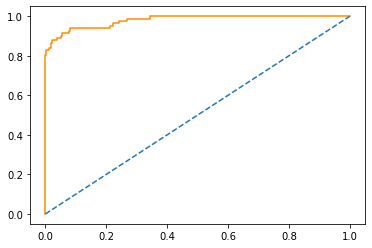

In [17]:
# Input the optimal parameters in the model
model = RandomForestClassifier(#class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=12,
                               max_features='auto', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=123)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

## Gradient boosted trees with XGBoost

D:\Program\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -0.011878 using {'learning_rate': 0.4}
-0.684018 (0.000062) with: {'learning_rate': 0.0001}
-0.609144 (0.000518) with: {'learning_rate': 0.001}
-0.235054 (0.003974) with: {'learning_rate': 0.01}
-0.015308 (0.005835) with: {'learning_rate': 0.1}
-0.012383 (0.005723) with: {'learning_rate': 0.2}
-0.012104 (0.006403) with: {'learning_rate': 0.3}
-0.011878 (0.005848) with: {'learning_rate': 0.4}


Text(0, 0.5, 'Log Loss')

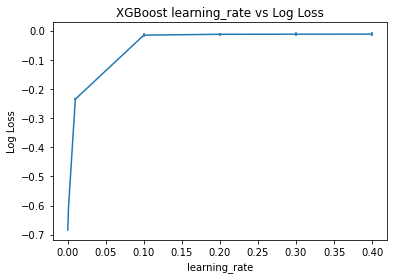

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
model = xgb.XGBClassifier(max_depth = 10)
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')

In [19]:
import time
start_time = time.time()
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.5]
n_estimators = [100, 200, 300, 400, 500]
max_depth=[3,5,8,10,12]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("time lasting: \n", (time.time() - start_time))

Best: -0.008897 using {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
time lasting: 
 1959.8045063018799


In [20]:
# Train a model with the optmized learning rate
clf_gbt = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 5,n_estimators=500).fit(X_train, np.ravel(y_train)) 
# Hyperparameters of gradient boosted trees

ROC Score:
0.9799486277595224

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2108
           1       0.88      0.83      0.86        82

    accuracy                           0.99      2190
   macro avg       0.94      0.91      0.92      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2099    9]
 [  14   68]]

accuracy:
0.9894977168949771
ROC Score:
0.9799486277595224


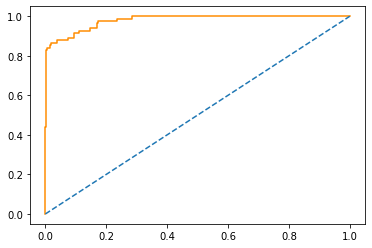

In [21]:
get_model_results(X_train, y_train, X_test, y_test, clf_gbt)

# Ensemble methods
Ensemble methods are techniques that create multiple machine learning models and then combine them to produce a final result

In [27]:
### Stacking Ensemble Methods_Voting Classifier

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=123,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=10, 
                              max_features='auto',
                              min_samples_leaf=10, 
                              n_estimators=20, 
                              n_jobs=-1,
                              random_state=123)

clf3 = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 5,n_estimators=500).fit(X_train, np.ravel(y_train))

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')



In [28]:
### Define model evaluation function
def get_model_results2(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
   
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)
    


    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))
    print('\naccuracy:')
    print(model.score(X_test, y_test))


In [29]:
# Get results 
get_model_results2(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2108
           1       0.57      0.85      0.68        82

    accuracy                           0.97      2190
   macro avg       0.78      0.91      0.83      2190
weighted avg       0.98      0.97      0.97      2190


Confusion Matrix:
[[2055   53]
 [  12   70]]

accuracy:
0.9703196347031964


In [30]:


### Adjusting weights within the Voting Classifier
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

In [31]:
# Get results 
get_model_results2(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2108
           1       0.61      0.84      0.70        82

    accuracy                           0.97      2190
   macro avg       0.80      0.91      0.85      2190
weighted avg       0.98      0.97      0.98      2190


Confusion Matrix:
[[2063   45]
 [  13   69]]

accuracy:
0.9735159817351599


Not bad!